In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("water_potability.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


ValueError: number of labels (1) does not match number of bars (10).

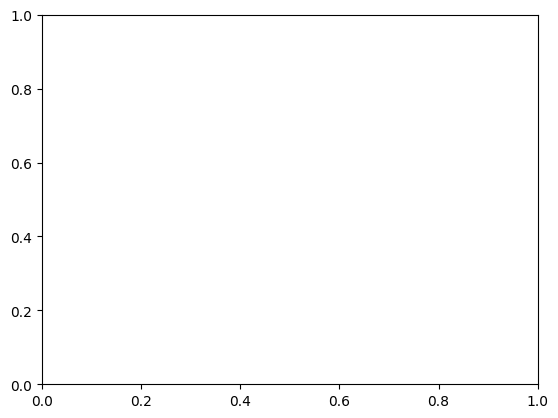

In [8]:
import matplotlib.pyplot as plt

labels = []
for i, df_visualize in enumerate(df.groupby(["Potability"])):
    labels.append(df_visualize[0])
    plt.bar(i, df_visualize[1].count(), label=df_visualize[0])
plt.xticks(range(len(labels)), labels)
plt.legend()
plt.title('Potability')
plt.show()

In [ ]:
data = df.groupby("Potability")["ph"].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Potability", fontsize=14)

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [9]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

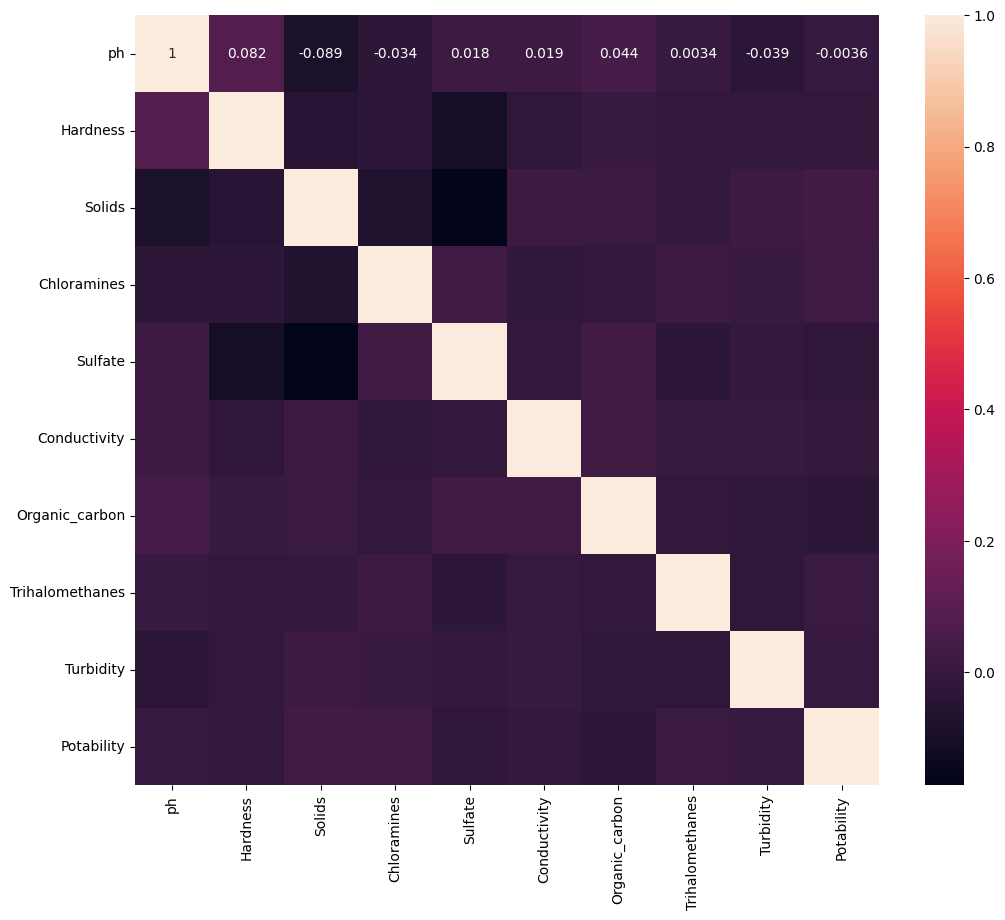

In [10]:
import seaborn as sb


plt.figure(figsize=(12,10))
sb.heatmap(df.corr(), annot=True)

In [11]:
df[df.columns[1:]].corr()['Potability'][:].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [12]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [14]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
x = df.drop(['Potability'], axis='columns')
y = df.Potability

In [16]:
from sklearn.preprocessing import MinMaxScaler


features_scaler = MinMaxScaler()
features = features_scaler.fit_transform(x)
features

array([[0.50262515, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,50],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,7,11,13]
        }
    },
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {}
    }
    
}

In [27]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Model training and evaluation
scores = []

for model_name, mp in model_params.items():
    if model_name == 'linear_regression':
        model = mp['model']
        X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        best_params = None  # Linear regression has no hyperparameters to tune
    else:
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(features, y)
        score = clf.best_score_
        best_params = clf.best_params_
        
    scores.append({
        'model': model_name,
        'best_score': score,
        'best_params': best_params
    })

df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.621794,"{'C': 50, 'kernel': 'rbf'}"
1,random_forest,0.634626,{'n_estimators': 100}
2,logistic_regression,0.610501,{'C': 1}
3,KNN,0.613859,{'n_neighbors': 13}
4,linear_regression,-0.000272,None


In [35]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(features, y)
    scores.append({
        'model': model_name,
        'best_score': abs(clf.best_score_),
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.621794,"{'C': 50, 'kernel': 'rbf'}"
1,random_forest,0.637369,{'n_estimators': 100}
2,logistic_regression,0.610501,{'C': 1}
3,KNN,0.613859,{'n_neighbors': 13}
4,linear_regression,0.065922,{}


/opt/anaconda3/envs/faisal/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/faisal/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/faisal/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 1.0)

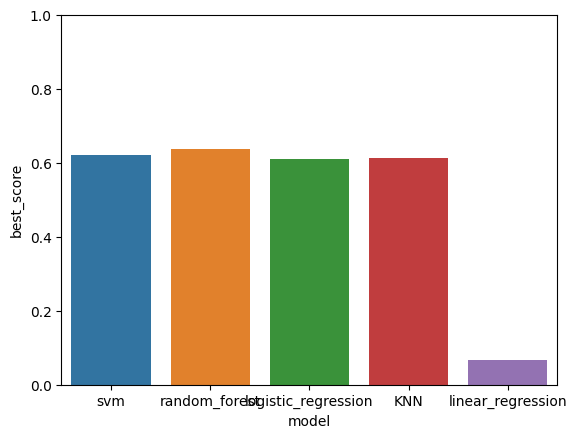

In [36]:
sb.barplot(x="model", y="best_score", data=df_score)
plt.ylim(0, 1)

In [37]:
row_score_max = df_score['best_score'].argmax()
df_score.loc[[row_score_max]]

,model,best_score,best_params
1,random_forest,0.637369,{'n_estimators': 100}


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=101)

In [39]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6752136752136753

Text(0.5, 47.7222222222222, 'Predicted')

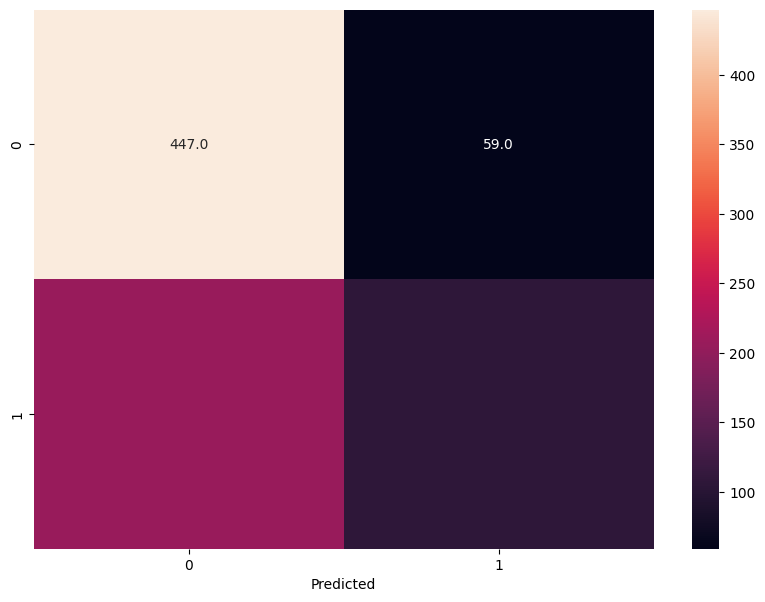

In [40]:
from sklearn.metrics import confusion_matrix


y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       506
           1       0.69      0.33      0.44       313

    accuracy                           0.69       819
   macro avg       0.69      0.62      0.61       819
weighted avg       0.69      0.69      0.65       819



In [35]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(features, y)

y_sm.value_counts()

Potability
0    1998
1    1998
Name: count, dtype: int64

In [37]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_sm, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score_smote = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score_smote

,model,best_score,best_params
0,svm,0.541299,"{'C': 50, 'kernel': 'rbf'}"
1,random_forest,0.700466,{'n_estimators': 100}
2,logistic_regression,0.519269,{'C': 10}
3,KNN,0.677941,{'n_neighbors': 3}


(0.0, 1.0)

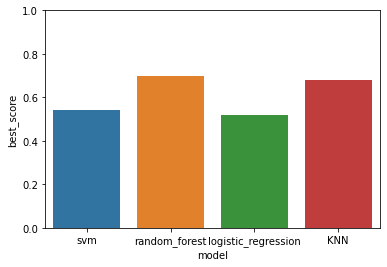

In [39]:
sb.barplot(x="model", y="best_score", data=df_score_smote)
plt.ylim(0, 1)

In [40]:
row_score_max_smote = df_score_smote['best_score'].argmax()
df_score_smote.loc[[row_score_max_smote]]

,model,best_score,best_params
1,random_forest,0.700466,{'n_estimators': 100}


In [41]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_sm, y_sm, test_size=0.25, random_state=101)

In [42]:
model_smote = RandomForestClassifier(n_estimators=100)
model_smote.fit(x_train_smote,y_train_smote)
model_smote.score(x_test_smote,y_test_smote)

0.7377377377377378

Text(0.5, 42.0, 'Predicted')

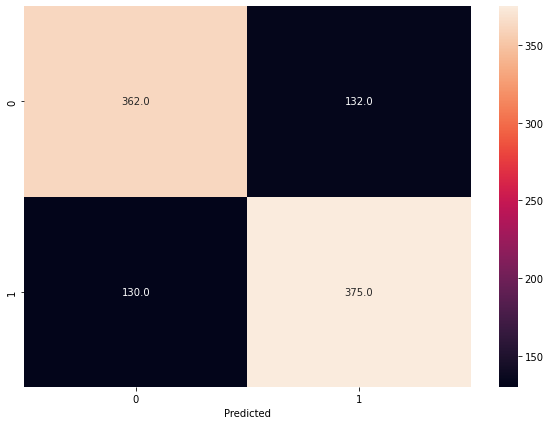

In [43]:
y_predicted_smote = model_smote.predict(x_test_smote)
cm = confusion_matrix(y_test_smote,y_predicted_smote)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

In [44]:
print(classification_report(y_test_smote,y_predicted_smote))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       494
           1       0.74      0.74      0.74       505

    accuracy                           0.74       999
   macro avg       0.74      0.74      0.74       999
weighted avg       0.74      0.74      0.74       999

